## Scatterplots, beta, alpha, and correlation

In [1]:
# The code below increases the size of the output screen...

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

beta_UPRO=  2.99475646614 (Tells you how much more reactive it is to the market than the comparing stock.)
alpha_UPRO=  -7.10611544156e-05 (Denotes how well it performs with respect to the comparing stock.)


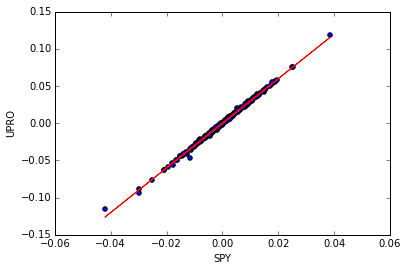



beta_GOOG=  1.08425377844
alpha_GOOG=  0.00152461712361


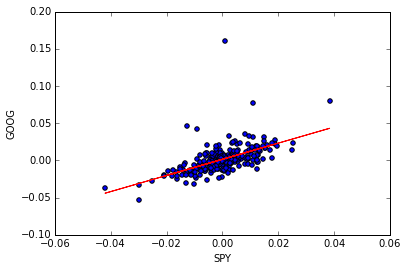



beta_AAPL=  1.15147758457
alpha_AAPL=  -5.51285190945e-05


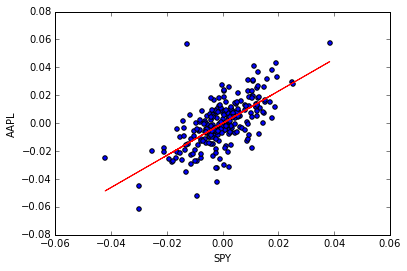



beta_AMZN=  1.12948776896
alpha_AMZN=  0.00322108446807


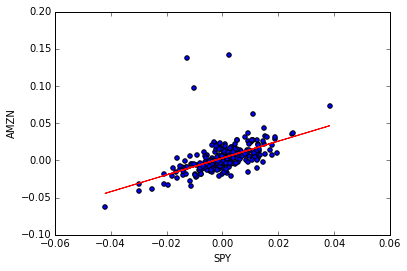



beta_DIS=  0.914095915082
alpha_DIS=  0.000513241992798


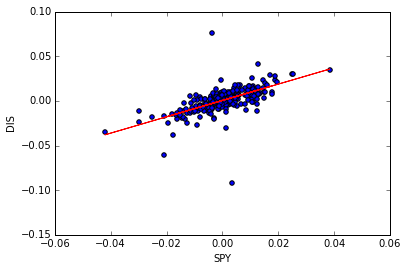



beta_NFLX=  1.3967286871
alpha_NFLX=  0.00365264499033


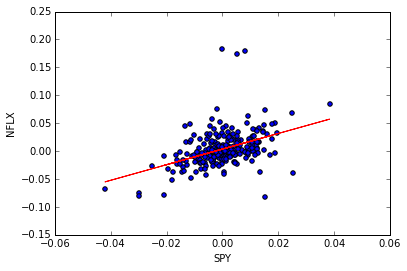



beta_FB=  1.07359828811
alpha_FB=  0.00116966502008


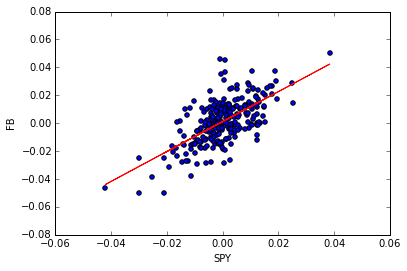



beta_AXY=  0.26388675324
alpha_AXY=  0.00170621755813


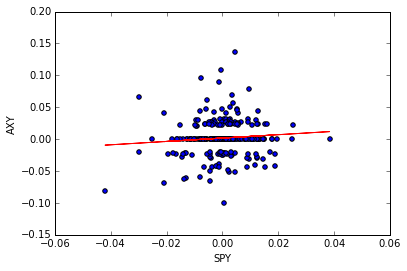



beta_VIX=  -8.11006785278
alpha_VIX=  0.00469886808393


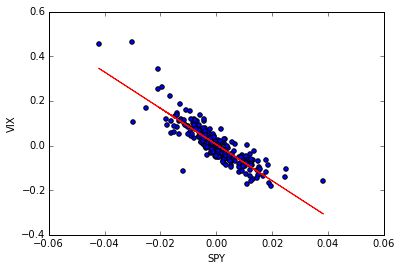



beta_TSLA=  1.14161565158
alpha_TSLA=  0.00054314891897


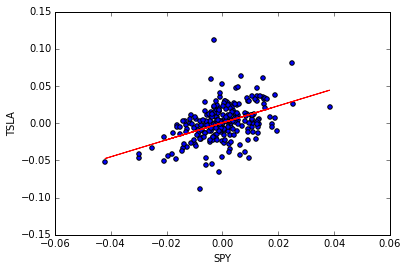



beta_GWPH=  1.08544880106
alpha_GWPH=  0.000295045632014


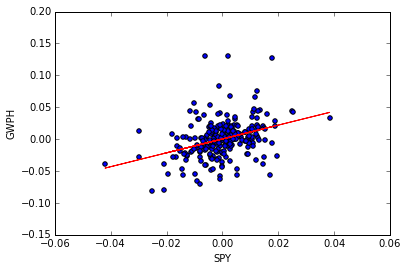



beta_MSFT=  1.24567840907
alpha_MSFT=  0.000819252671052


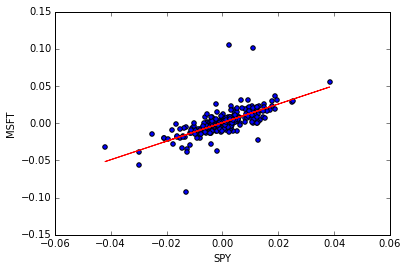



beta_GLD=  -0.0381942167525
alpha_GLD=  -0.000422227807616


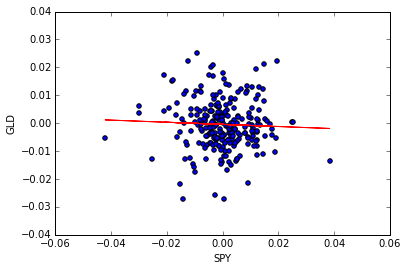



           SPY      UPRO      GOOG      AAPL      AMZN       DIS      NFLX  \
SPY   1.000000  0.998732  0.566941  0.665101  0.519442  0.624869  0.425528   
UPRO  0.998732  1.000000  0.570875  0.666323  0.518406  0.622716  0.423572   
GOOG  0.566941  0.570875  1.000000  0.379942  0.584354  0.262980  0.354077   
AAPL  0.665101  0.666323  0.379942  1.000000  0.364390  0.414790  0.250095   
AMZN  0.519442  0.518406  0.584354  0.364390  1.000000  0.334261  0.325807   
DIS   0.624869  0.622716  0.262980  0.414790  0.334261  1.000000  0.223100   
NFLX  0.425528  0.423572  0.354077  0.250095  0.325807  0.223100  1.000000   
FB    0.645372  0.645801  0.569268  0.549039  0.500240  0.408170  0.364903   
AXY   0.088669  0.086159  0.029957  0.109736  0.044646 -0.056184 -0.039314   
VIX  -0.873452 -0.866048 -0.486860 -0.565636 -0.462053 -0.563594 -0.419404   
TSLA  0.453907  0.452715  0.290954  0.294923  0.323259  0.255215  0.299695   
GWPH  0.354460  0.355169  0.123100  0.265150  0.154490  0.2188

In [31]:
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0,:] = 0
    
    return daily_returns


def daily_returns():
    # Read data
    dates = pd.date_range('2015-01-01', '2015-12-31')
    symbols = ['SPY','UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    df = get_data(symbols, dates)
    
    # fill empty trade dates (for AXY)
    df.fillna(method="ffill", inplace="True")
    df.fillna(method="bfill", inplace="True")
    
    # plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    # Scatterplot - SPY and UPRO
    daily_returns.plot(kind='scatter', x='SPY', y='UPRO')
    beta_UPRO, alpha_UPRO =np.polyfit(daily_returns['SPY'], daily_returns['UPRO'],1)
    print "beta_UPRO= ", beta_UPRO, "(Tells you how much more reactive it is to the market than the comparing stock.)"
    print "alpha_UPRO= ", alpha_UPRO, "(Denotes how well it performs with respect to the comparing stock.)"
    plt.plot(daily_returns['SPY'], beta_UPRO*daily_returns['SPY'] + alpha_UPRO, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and GOOG
    daily_returns.plot(kind='scatter', x='SPY', y='GOOG')
    beta_GOOG, alpha_GOOG =np.polyfit(daily_returns['SPY'], daily_returns['GOOG'],1)
    print "beta_GOOG= ", beta_GOOG
    print "alpha_GOOG= ", alpha_GOOG
    plt.plot(daily_returns['SPY'], beta_GOOG*daily_returns['SPY'] + alpha_GOOG, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and AAPL
    daily_returns.plot(kind='scatter', x='SPY', y='AAPL')
    beta_AAPL, alpha_AAPL =np.polyfit(daily_returns['SPY'], daily_returns['AAPL'],1)
    print "beta_AAPL= ", beta_AAPL
    print "alpha_AAPL= ", alpha_AAPL
    plt.plot(daily_returns['SPY'], beta_AAPL*daily_returns['SPY'] + alpha_AAPL, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and AMZN
    daily_returns.plot(kind='scatter', x='SPY', y='AMZN')
    beta_AMZN, alpha_AMZN =np.polyfit(daily_returns['SPY'], daily_returns['AMZN'],1)
    print "beta_AMZN= ", beta_AMZN
    print "alpha_AMZN= ", alpha_AMZN
    plt.plot(daily_returns['SPY'], beta_AMZN*daily_returns['SPY'] + alpha_AMZN, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and DIS
    daily_returns.plot(kind='scatter', x='SPY', y='DIS')
    beta_DIS, alpha_DIS =np.polyfit(daily_returns['SPY'], daily_returns['DIS'],1)
    print "beta_DIS= ", beta_DIS
    print "alpha_DIS= ", alpha_DIS
    plt.plot(daily_returns['SPY'], beta_DIS*daily_returns['SPY'] + alpha_DIS, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and NFLX
    daily_returns.plot(kind='scatter', x='SPY', y='NFLX')
    beta_NFLX, alpha_NFLX =np.polyfit(daily_returns['SPY'], daily_returns['NFLX'],1)
    print "beta_NFLX= ", beta_NFLX
    print "alpha_NFLX= ", alpha_NFLX
    plt.plot(daily_returns['SPY'], beta_NFLX*daily_returns['SPY'] + alpha_NFLX, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and FB
    daily_returns.plot(kind='scatter', x='SPY', y='FB')
    beta_FB, alpha_FB =np.polyfit(daily_returns['SPY'], daily_returns['FB'],1)
    print "beta_FB= ", beta_FB
    print "alpha_FB= ", alpha_FB
    plt.plot(daily_returns['SPY'], beta_FB*daily_returns['SPY'] + alpha_FB, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and AXY
    daily_returns.plot(kind='scatter', x='SPY', y='AXY')
    beta_AXY, alpha_AXY =np.polyfit(daily_returns['SPY'], daily_returns['AXY'],1)
    print "beta_AXY= ", beta_AXY
    print "alpha_AXY= ", alpha_AXY
    plt.plot(daily_returns['SPY'], beta_AXY*daily_returns['SPY'] + alpha_AXY, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and VIX
    daily_returns.plot(kind='scatter', x='SPY', y='VIX')
    beta_VIX, alpha_VIX =np.polyfit(daily_returns['SPY'], daily_returns['VIX'],1)
    print "beta_VIX= ", beta_VIX
    print "alpha_VIX= ", alpha_VIX
    plt.plot(daily_returns['SPY'], beta_VIX*daily_returns['SPY'] + alpha_VIX, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and TSLA
    daily_returns.plot(kind='scatter', x='SPY', y='TSLA')
    beta_TSLA, alpha_TSLA =np.polyfit(daily_returns['SPY'], daily_returns['TSLA'],1)
    print "beta_TSLA= ", beta_TSLA
    print "alpha_TSLA= ", alpha_TSLA
    plt.plot(daily_returns['SPY'], beta_TSLA*daily_returns['SPY'] + alpha_TSLA, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and GWPH
    daily_returns.plot(kind='scatter', x='SPY', y='GWPH')
    beta_GWPH, alpha_GWPH =np.polyfit(daily_returns['SPY'], daily_returns['GWPH'],1)
    print "beta_GWPH= ", beta_GWPH
    print "alpha_GWPH= ", alpha_GWPH
    plt.plot(daily_returns['SPY'], beta_GWPH*daily_returns['SPY'] + alpha_GWPH, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and MSFT
    daily_returns.plot(kind='scatter', x='SPY', y='MSFT')
    beta_MSFT, alpha_MSFT =np.polyfit(daily_returns['SPY'], daily_returns['MSFT'],1)
    print "beta_MSFT= ", beta_MSFT
    print "alpha_MSFT= ", alpha_MSFT
    plt.plot(daily_returns['SPY'], beta_MSFT*daily_returns['SPY'] + alpha_MSFT, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and GLD
    daily_returns.plot(kind='scatter', x='SPY', y='GLD')
    beta_GLD, alpha_GLD =np.polyfit(daily_returns['SPY'], daily_returns['GLD'],1)
    print "beta_GLD= ", beta_GLD
    print "alpha_GLD= ", alpha_GLD
    plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-', color='r')
    plt.show()
    print "\n"
    
    print daily_returns.corr(method='pearson')
    
if __name__ == "__main__":
    
    daily_returns()
